# **Chocolate Bar Ratings Analysis**
## For this analysis a csv file will be used: `flavors_of_cacao.csv` provided by Kaggle.com, with data from the Manhattan Chocolate Society.
***
### `flavors_of_cacao.csv` contains expert ratings of over 1,700 individual chocolate bars, along with information on their regional origin, percentage of cocoa, the variety of chocolate bean used and where the beans were grown.

***

### The following questions will be answered by performing a descriptive and exploratory data analysis:
1. Is there an association between country of production and rating?
2. Where are the best cocoa beans grown?
3. Which countries produce the highest-rated bars?
4. What’s the relationship between cocoa solids percentage and rating?

# *Dataset Exploration*

 #### Columns:
- **Company \n(Maker-if known)**: Name of the company manufacturing the bar

- **Specific Bean Origin\nor Bar Name**: The specific geo-region of origin for the bar

- **REF**: A value linked to when the review was entered in the database. Higher = more recent

- **Review\nDate**: Date of publication of the review
- **Cocoa\nPercent**: Cocoa percentage (darkness) of the chocolate bar being reviewed
- **Company\nLocation**: Manufacturer base country.
- **Rating**: Expert rating for the bar.
- **Bean\nType**: The variety (breed) of bean used, if provided
- **Broad Bean\nOrigin**: The broad geo-region of origin for the bean

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

cacao = pd.read_csv('flavors_of_cacao.csv')

In [25]:
print(f'\nNumber of (rows, columns) in the dataset: {cacao.shape}\n')
display(cacao.head())


Number of (rows, columns) in the dataset: (1795, 9)



,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


In [26]:
# rename columns for clarity
cacao = cacao.rename({cacao.columns[0]: 'Company or Maker','Bean\nType': 'Bean Type','Review\nDate': 'Review Date',
                      'Cocoa\nPercent': 'Cocoa Percent', 'Specific Bean Origin\nor Bar Name': 'Specific Bean Origin or Bar Name',
                      'Broad Bean\nOrigin': 'Broad Bean Origin', 'Company\nLocation': 'Company Location'}, axis=1)
print(cacao.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Company or Maker                  1795 non-null   object 
 1   Specific Bean Origin or Bar Name  1795 non-null   object 
 2   REF                               1795 non-null   int64  
 3   Review Date                       1795 non-null   int64  
 4   Cocoa Percent                     1795 non-null   object 
 5   Company Location                  1795 non-null   object 
 6   Rating                            1795 non-null   float64
 7   Bean Type                         1794 non-null   object 
 8   Broad Bean Origin                 1794 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 126.3+ KB
None


#### Check for duplicate rows and null values:

In [27]:
print(f'\nDuplicate rows: {cacao.duplicated().sum()}\n')
print(cacao.isna().sum())
display(cacao[cacao.isna().any(axis=1)])


Duplicate rows: 0

Company or Maker                    0
Specific Bean Origin or Bar Name    0
REF                                 0
Review Date                         0
Cocoa Percent                       0
Company Location                    0
Rating                              0
Bean Type                           1
Broad Bean Origin                   1
dtype: int64


,Company or Maker,Specific Bean Origin or Bar Name,REF,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin
1072,Mast Brothers,Madagascar,999,2012,72%,U.S.A.,2.5,Trinitario,NaN
1544,Soma,"Three Amigos(Chuao, Wild Bolivia, D.R.)",676,2011,70%,Canada,4.0,NaN,"Ven, Bolivia, D.R."


#### There are **0 duplicates** and **2 null values** in this dataset. Looking at the rest of the values in the row 1072 the Specific Bean Origin  is 'Madagascar', so the Broad Bean Origin value will be replaced with 'Madagascar' as well. The row 1544 will be left as is for now.

In [28]:
cacao.at[1072,'Broad Bean Origin'] = 'Madagascar'
display(cacao.loc[1072:1072])

,Company or Maker,Specific Bean Origin or Bar Name,REF,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin
1072,Mast Brothers,Madagascar,999,2012,72%,U.S.A.,2.5,Trinitario,Madagascar


### The Bean Type column seems to have a lot of missing values but not shown as NaN.

In [29]:
print(cacao['Bean Type'].values) 
print(cacao['Bean Type'].isin(['\xa0']).sum())

['\xa0' '\xa0' '\xa0' ... 'Forastero' '\xa0' '\xa0']
887


#### Seems like it's the value `'\xa0'` which is displayed as whitespace. It appears 887 times, almost 50% of the rows, so the column will be dropped.

In [30]:
cacao.drop('Bean Type', axis=1, inplace=True)

# *Further exploration and analysis of columns*

### Cocoa Percent column:

In [31]:
# remove '%' from Cocoa Percent and convert the values from strings to numbers
cacao['Cocoa Percent'] = cacao['Cocoa Percent'].replace('[\%]', '',regex=True)
cacao['Cocoa Percent'] = pd.to_numeric(cacao['Cocoa Percent'])

In [32]:
print(f'\nNumber of different cocoa percentages: {cacao["Cocoa Percent"].nunique()}\n')
print(f'The Interquartile Range is: {np.quantile(cacao["Cocoa Percent"],0.75) - np.quantile(cacao["Cocoa Percent"],0.25)}\n')
print(f'The lowest percentage of cocoa: {cacao["Cocoa Percent"].min()}%\n')
print(f'The highest percentage of cocoa: {cacao["Cocoa Percent"].max()}%\n')
print(f'The most frequent percentage of cocoa: {cacao["Cocoa Percent"].mode()[0]}%\n')
print(f'The median percentage of cocoa: {cacao["Cocoa Percent"].median()}%\n')
print(f'The average of the bars contain {round(cacao["Cocoa Percent"].mean())}% of cocoa\n')


Number of different cocoa percentages: 45

The Interquartile Range is: 5.0

The lowest percentage of cocoa: 42.0%

The highest percentage of cocoa: 100.0%

The most frequent percentage of cocoa: 70.0%

The median percentage of cocoa: 70.0%

The average of the bars contain 72% of cocoa



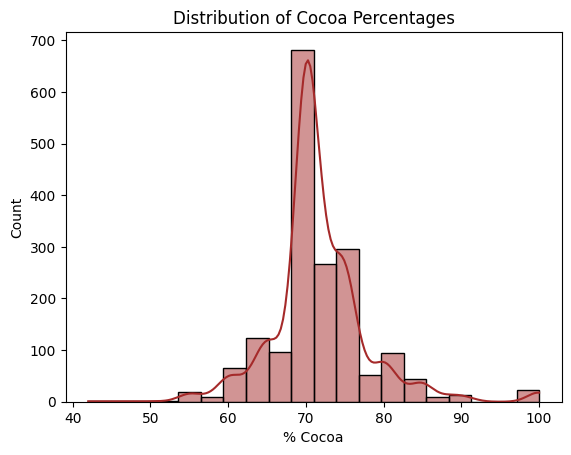

In [33]:
sns.histplot(cacao["Cocoa Percent"],bins=20, color='brown', kde=True)
plt.xlabel('% Cocoa')
plt.title('Distribution of Cocoa Percentages')
plt.show()

#### The distribution is bell shaped. With most of the data being in the 60-85 range.

### Company Location column:

In [34]:
print(f'\nNumber of countries tha produce chocolate bars: {cacao["Company Location"].nunique()}\n')


Number of countries tha produce chocolate bars: 60



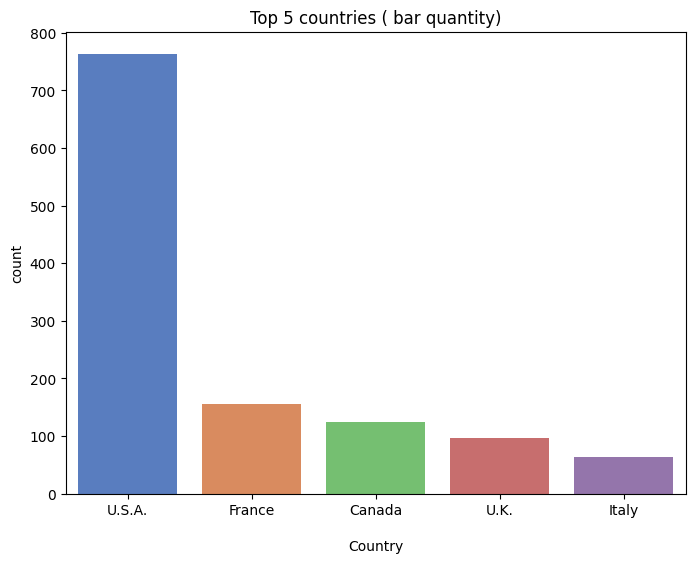

In [35]:
plt.figure(figsize=(8,6))
top5 = cacao['Company Location'].value_counts()[:5]
sns.barplot(x=top5.index, y=top5, palette='muted')
plt.title('Top 5 countries ( bar quantity)')
plt.xlabel('\nCountry')
plt.show()

#### In this dataset U.S.A. is the winner in terms of number of bars reviewed. The rest of the countries had far fewer bars reviewed. Maybe that is because the Manhattan chocolate society is US based.

### Now for the association between country of production and rating. 
### U.K. and Italy will be compared:

#### The Rating system is as follows:
##### 5 = Elite (Transcending beyond the ordinary limits)
##### 4 = Premium (Superior flavor development, character and style)
##### 3 = Satisfactory(3.0) to praiseworthy(3.75) (well made with special qualities)
##### 2 = Disappointing (Passable but contains at least one significant flaw)
##### 1 = Unpleasant (mostly unpalatable)

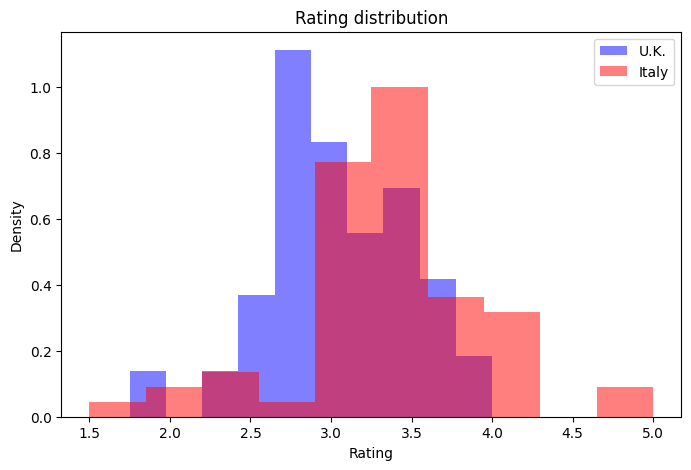

In [36]:
plt.figure(figsize=(8,5))
plt.hist(cacao['Rating'][cacao['Company Location']=='U.K.'], alpha=0.5, color='blue', density=True, label='U.K.')
plt.hist(cacao['Rating'][cacao['Company Location']=='Italy'], alpha=0.5, color ='red', density=True, label='Italy')
plt.title('Rating distribution')
plt.xlabel('Rating')
plt.ylabel('Density')
plt.legend()
plt.show()

#### The overlapping histograms above show that **an association exists** between country of production and rating. Italy(red) has the majority of the ratings shifted to the right compared to U.K.(blue) .

### Bean Origin column:

In [37]:
print(f'\nNumber of bean origin locations: {cacao["Broad Bean Origin"].nunique()}')


Number of bean origin locations: 100


#### After examining the column values, one seems to be problematic. It's the '\xa0' value. Since this displays a whitespace character it will be replaced with 'Unspecified'.

In [38]:
# replacing the '\xa0' value with 'Unspecified'
cacao['Broad Bean Origin'] = cacao['Broad Bean Origin'].replace('\xa0', 'Unspecified')

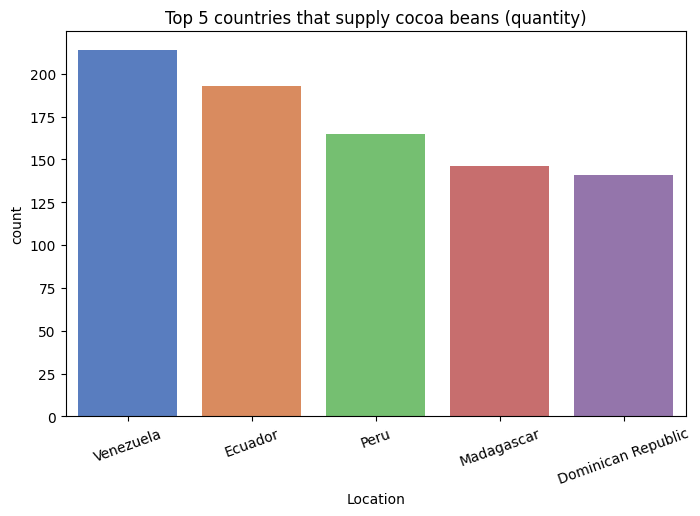

In [39]:
plt.figure(figsize=(8,5))
top5_or = cacao['Broad Bean Origin'].value_counts()[:5]
sns.barplot(x=top5_or.index, y=top5_or, palette='muted')
plt.title('Top 5 countries that supply cocoa beans (quantity)')
plt.xticks(rotation=20)
plt.xlabel('Location')
plt.show()

### Company or Maker column:

In [40]:
print(f'Number of producers: {cacao["Company or Maker"].nunique()}')

Number of producers: 416


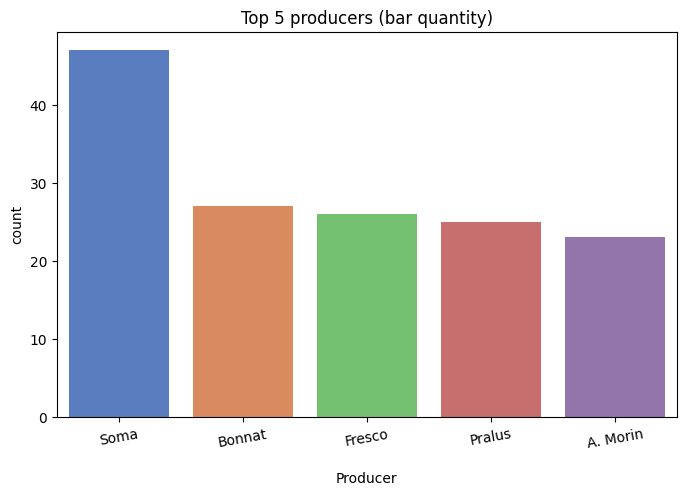

In [41]:
plt.figure(figsize=(8,5))
top5_p = cacao['Company or Maker'].value_counts()[:5]
sns.barplot(x=top5_p.index, y=top5_p, palette='muted')
plt.title('Top 5 producers (bar quantity)')
plt.xticks(rotation=10)
plt.xlabel('\nProducer')
plt.show()

### Where are the best cocoa beans grown?

In [42]:
sort1 = cacao.groupby(['Broad Bean Origin']).Rating.value_counts().reset_index()
sorted1 = sort1.sort_values('count',ascending=False)
print(sorted1[sorted1['Rating']>=4][:21])

       Broad Bean Origin  Rating  count
322            Venezuela     4.0     20
178           Madagascar     4.0     12
221                 Peru     4.0     12
90               Ecuador     4.0      9
211     Papua New Guinea     4.0      5
23                Brazil     4.0      3
16               Bolivia     4.0      3
190               Mexico     4.0      3
42              Colombia     4.0      3
165              Jamaica     4.0      2
58            Costa Rica     4.0      2
110                Ghana     4.0      2
303          Unspecified     4.0      2
132                Haiti     4.0      2
129            Guatemala     4.0      2
331      Venezuela, Java     4.0      1
254  Sao Tome & Principe     4.0      1
259        South America     4.0      1
339              Vietnam     4.0      1
267            St. Lucia     4.0      1
327            Venezuela     5.0      1


#### The majority of high-rated bars have beans from Venezuela, Madagascar and Peru follow. The rest of the countries have very few bars made from their beans. It's worth to mention that Venezuela also supplied the beans for a rated-5 bar.

### Which countries produce the highest-rated bars?

In [43]:
sort2 = cacao.groupby(['Company Location']).Rating.value_counts().reset_index()
sorted2 = sort2.sort_values(by='count',ascending=False)
print('\nCountries that produce rated 4 and higher bars:')
print(sorted2[sorted2['Rating']>=4])


Countries that produce rated 4 and higher bars:
    Company Location  Rating  count
247           U.S.A.     4.0     25
85            France     4.0     23
42            Canada     4.0     10
136            Italy     4.0      7
226      Switzerland     4.0      6
21           Belgium     4.0      6
12         Australia     4.0      4
238             U.K.     4.0      4
215            Spain     4.0      3
74           Ecuador     4.0      3
137            Italy     5.0      2
197         Sao Tome     4.0      1
203         Scotland     4.0      1
98           Germany     4.0      1
109        Guatemala     4.0      1
36            Brazil     4.0      1
53          Colombia     4.0      1
160       Madagascar     4.0      1


#### USA, France and Canada produce a lot of high-rated bars. Italy is the single country that produced rated-5 bars.

### What’s the relationship between cocoa solids percentage and rating?

In [44]:
sort3 = cacao.groupby(['Rating'])['Cocoa Percent'].value_counts().reset_index()
sorted3 = sort3.sort_values('count',ascending=False)
print('\nCocoa Percentages with a rating of 4 and above:')
print(sorted3[sorted3['Rating']>=4])


Cocoa Percentages with a rating of 4 and above:
     Rating  Cocoa Percent  count
213     4.0           70.0     43
214     4.0           75.0     17
215     4.0           72.0     11
217     4.0           64.0      4
216     4.0           74.0      4
219     4.0           63.0      3
218     4.0           67.0      3
221     4.0           68.0      2
222     4.0           69.0      2
220     4.0           65.0      2
230     5.0           70.0      2
229     4.0           60.0      1
228     4.0           66.0      1
227     4.0           71.0      1
226     4.0           73.0      1
225     4.0           78.0      1
224     4.0           80.0      1
223     4.0           88.0      1


#### The majority of the high rated bars are in the 70-75 percentage range.

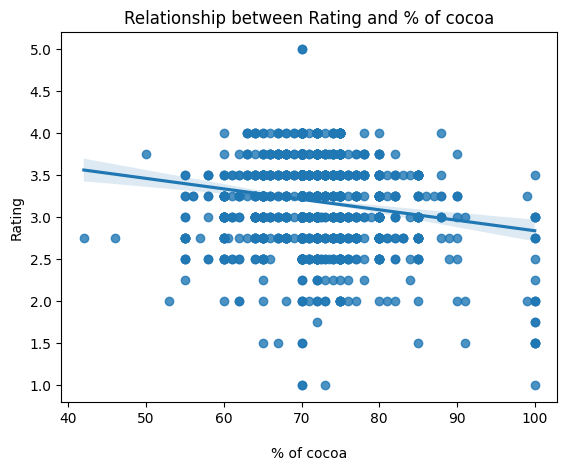

Correlation coefficient: -0.1648201776242446


In [45]:
sns.regplot(data=cacao,x='Cocoa Percent', y='Rating')
plt.title('Relationship between Rating and % of cocoa')
plt.xlabel('\n% of cocoa')
plt.show()

print(f"Correlation coefficient: {np.corrcoef(cacao['Cocoa Percent'], cacao['Rating'])[0][1]}")

#### Both the fitted line and the correlation coefficient of -0.16 indicate a **weak negative linear relationship** between rating and cocoa percentage.

# *Conclusions*

### Not all chocolate bars are made equal. After analyzing over 1700 bars valuable information was gained. Venezuela seems to be the number one bean supplier in both quantity and quality. Italy produces very highly rated bars among the countries and the cocoa percentage seems to affect the overall rating of the chocolate bar, with 70% being the sweetspot.